# Trabajo Práctico 2 - Matrices Insumo-Producto

In [30]:
import numpy as np
import scipy.linalg as lng
import matplotlib.pyplot as plt
from funciones import *

## Consigna 1

Sean $A$ una matriz cuadrada e $I$ la matriz identidad tales que 
$$
(I-A)^{-1} = I + A + A² + A³ + ... + A^n + ...
$$
$$
(I-A)^{-1}=I + \sum_{i=1}^{\infty} A^{i}
$$
Queremos probar que 
$$
\lim_{n \to \infty} A^{n+1} = 0
$$


### Demostración

Expresando la serie como límite, obtenemos que
$$
(I-A)^{-1}=I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}
$$
$$
\implies (I-A)^{-1}(I-A)=(I + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i})(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i}(I-A) = I
$$
$$
\implies I - A + \lim_{n \to \infty} \sum_{i=1}^{n} A^{i} - A^{i+1} = I
$$
$$
\implies \lim_{n \to \infty} A - A^{2} + A^{2} - A^{3} + ... + A^{n} -A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A - A^{n+1} = A
$$
$$
\implies A - \lim_{n \to \infty} A^{n+1} = A
$$
$$
\implies \lim_{n \to \infty} A^{n+1} = 0
$$

## Consigna 2

Usamos un for para obtener las potencias de las matrices y vamos guardando las normas usando scipy.linalg.norm. 
Experimentalmente notamos que las potencias de la matriz $A_1$ tienden a infinito, mientras que las de la matriz $A_2$ tienden a 0. 

In [31]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

print(np.linalg.eigvals(A1))
print(np.linalg.eigvals(A2))


N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)
for n in range(N):
    if not (np.any(np.isinf(A1)) or np.any(np.isinf(A2))):    
        a1[n] = lng.norm(A1,2)
        a2[n] = lng.norm(A2,2)
        A1 = A1@A1
        A2 = A2@A2
    else :
        print(f"La matriz comienza a divergir en la iteración número {n}")
        break


[ 1.        +0.j         -0.27661726+0.j         -0.08954301+0.j
  0.16658013+0.04596704j  0.16658013-0.04596704j]
[ 0.92765145+0.j         -0.3586386 +0.j          0.2147141 +0.11607042j
  0.2147141 -0.11607042j -0.03144105+0.j        ]
La matriz comienza a divergir en la iteración número 65


/tmp/ipykernel_61213/2108234822.py:29: RuntimeWarning: overflow encountered in matmul
  A1 = A1@A1


A continuación, graficamos los vectores $a_1$ y $a_2$ definidos de la siguiente manera: $a_1(n)= ||A_1^n||_2$, $a_2(n)= ||A_2^n||_2$.

Dado que a partir de $n=65$ la matriz $A_1$ diverge, observemos las primeras 65 coordenadas. Las matrices $A_1$ y $A_2$ tienen la misma norma en aproximadamente sus primeras 60 potencias, luego $||A_1^n||_2$ comienza a crecer exponencialmente (Todas las entradas de la potencia tienden a infinito) mientras que $||A_2^n||_2$ converge a 0 (Todas las entradas de la potencia tienden a 0).

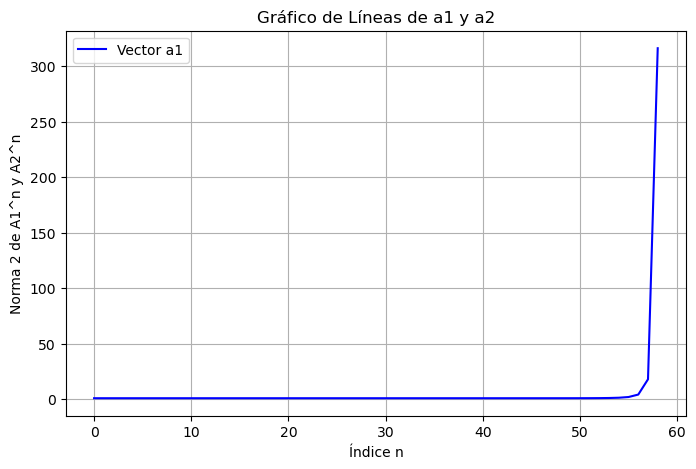

In [13]:
plt.figure(figsize=(8, 5))
# Grafico del vector a1
plt.plot(a1[:59], label='Vector a1', color='blue', linestyle='-')  # Línea para a1

plt.title('Gráfico de Líneas de a1 y a2')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A1^n y A2^n')

plt.legend()
plt.grid(True)
plt.show()

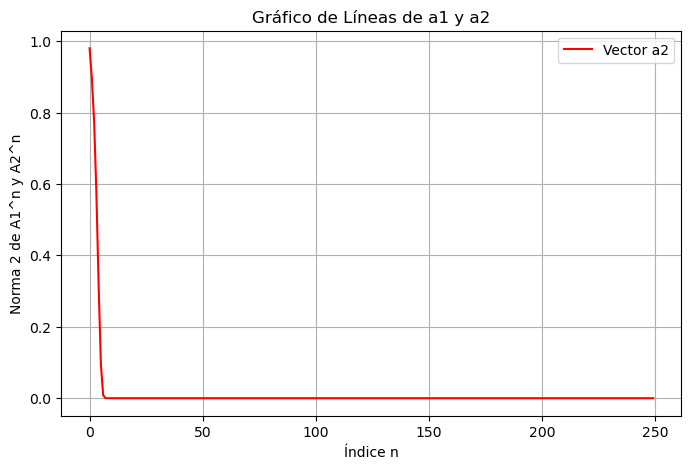

In [15]:
plt.figure(figsize=(8, 5))

plt.plot(a2, label='Vector a2', color='red', linestyle='-')   # Línea para a2
plt.title('Gráfico de Líneas de a1 y a2')
plt.xlabel('Índice n')
plt.ylabel('Norma 2 de A1^n y A2^n')

plt.legend()
plt.grid(True)
plt.show()

## Consigna 3

In [33]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])
promedio_A1, desviacion_A1 = monteCarlo(A1, 250)
promedio_A2, desviacion_A2 = monteCarlo(A2, 250)

print(f"A1 - Promedio: {promedio_A1}, Desviación Estándar: {desviacion_A1}")
print(f"A2 - Promedio: {promedio_A2}, Desviación Estándar: {desviacion_A2}")

A1 - Promedio: 0.9999999999999999, Desviación Estándar: 1.1102230246251565e-16
A2 - Promedio: 0.9276514472123604, Desviación Estándar: 2.658051068430719e-16


## Consigna 4

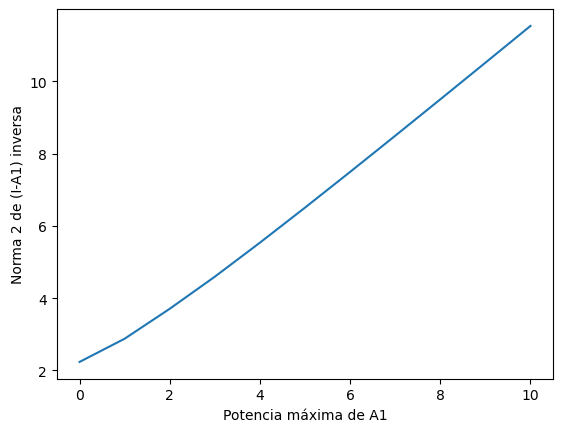

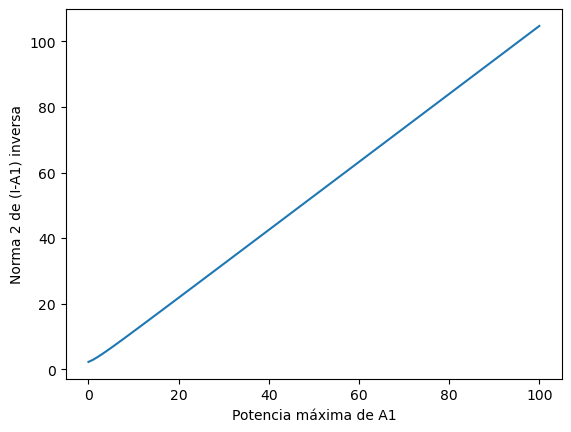

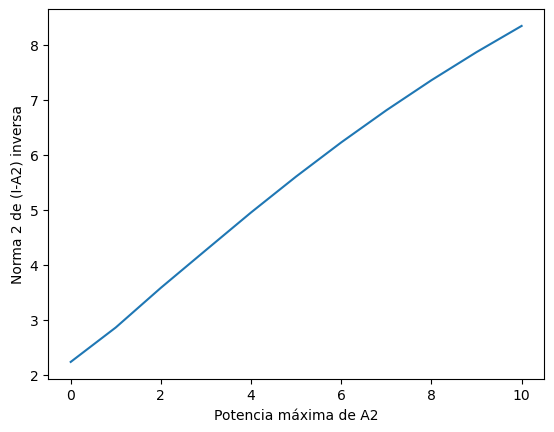

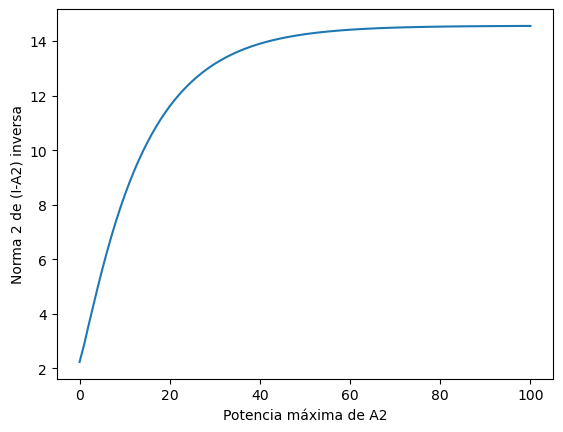

In [34]:
# gráficos
X , Y = normas_de_series_de_potencias(A1,10)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A1")
plt.ylabel("Norma 2 de (I-A1) inversa")
plt.show()



X , Y = normas_de_series_de_potencias(A1,100)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A1")
plt.ylabel("Norma 2 de (I-A1) inversa")
plt.show()
    


X , Y = normas_de_series_de_potencias(A2,10)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A2")
plt.ylabel("Norma 2 de (I-A2) inversa")
plt.show()



X , Y = normas_de_series_de_potencias(A2,100)

plt.plot(X,Y)
plt.xlabel("Potencia máxima de A2")
plt.ylabel("Norma 2 de (I-A2) inversa")
plt.show()


b) Por lo visto en los gráficos del punto anterior, $A_2$ converge mientras que $A_1$ diverge.

c) La serie infinita $I + A + A^2 + A^3 + ... + A^n + ...$ converge si y solo si el módulo del autovalor de módulo máximo es menor estricto que 1 pues en este caso, por la proposición 5.15 del apunte, 
$$
\lim_{n \to \infty} ||A^{n}|| = 0
$$


d)


In [36]:
A2 = np.array([
    [0.186, 0.521, 0.014, 0.32,  0.134],
    [0.24,  0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12,  0.311, 0.302, 0.208],
    [0.173, 0.03,  0.133, 0.14,  0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

I = np.eye(A2.shape[0])
L,U,P = calcularLU(I-A2)
inv = inversaLU(L,U,P)
e_n = np.zeros(100)

for n in range(100): 
    suma = I
    for i in range(n):
        suma += A2
        A2 = A2@A2
    resta = suma - inv
    e_n[n] = np.linalg.norm(resta,2 )

e_n

[[1.186 0.521 0.014 0.32  0.134]
 [0.24  1.073 0.219 0.013 0.327]
 [0.098 0.12  1.311 0.302 0.208]
 [0.173 0.03  0.133 1.14  0.074]
 [0.003 0.256 0.323 0.225 1.257]]
[[1.40277  0.701523 0.220899 0.465471 0.390321]
 [0.326852 1.313751 0.413806 0.232282 0.513584]
 [0.228376 0.279446 1.542723 0.517922 0.400864]
 [0.249854 0.161427 0.225877 1.272166 0.164034]
 [0.136348 0.387553 0.592495 0.416159 1.490997]]
[[1.5377726  0.8699439  0.43144685 0.64948863 0.59254546]
 [0.43371994 1.47181713 0.59446607 0.40442054 0.68174027]
 [0.34300943 0.43206577 1.72648432 0.68729089 0.57329312]
 [0.31220061 0.25096539 0.32544142 1.36689845 0.25913522]
 [0.25770953 0.54217326 0.78897537 0.59258972 1.67366387]]
[[1.63414807 0.9991812  0.58704359 0.79209452 0.7389119 ]
 [0.51688924 1.58378649 0.72889974 0.52786864 0.80816962]
 [0.42734643 0.54536812 1.86270272 0.81224719 0.70142886]
 [0.35904764 0.31400111 0.40115796 1.43640046 0.33034849]
 [0.34630941 0.66108141 0.93202365 0.72375792 1.8082314 ]]
[[1.6869561

[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675

[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675

[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675  0.62788878 1.96191493 0.90326055 0.79474977]
 [0.3931922  0.35987516 0.45631099 1.48699569 0.38222649]
 [0.41080371 0.74773098 1.03619996 0.81932513 1.90622165]]
[[1.7042842  1.09341067 0.70033303 0.89602174 0.84547414]
 [0.57751907 1.66524416 0.8268339  0.6177096  0.90028837]
 [0.4887675

array([13.43993048, 12.46915129, 10.79738803,  9.81195929,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80331186,
        9.80331186,  9.80331186,  9.80331186,  9.80331186,  9.80